# **Menuju Keselamatan Berkendara: Integrasi Computer Vision dalam Penegakan Hukum Lalu Lintas Elektronik (e-TLE)**

Syahel Rusfi Razaba (11210940000048)

## **Latar Belakang**
Dalam upaya meningkatkan kedisiplinan lalu lintas dan memberikan solusi yang efisien terhadap pelanggaran, penerapan teknologi *computer vision* dalam bentuk tilang otomatis telah menjadi salah satu inovasi yang menjanjikan. Computer vision, sebagai cabang kecerdasan buatan yang memungkinkan mesin untuk memahami dan merespons dunia visual, memberikan potensi besar dalam mendeteksi serta mengidentifikasi pelanggaran lalu lintas secara otomatis. Penerapan tilang otomatis dengan memanfaatkan ilmu computer vision dapat memberikan kontribusi signifikan dalam menciptakan lingkungan lalu lintas yang lebih aman dan tertib.

Untuk mewujudkan lingkungan lalu lintas yang lebih aman dan tertib, pemerintah di Indonesia sudah mulai menerapkan *Electronic Traffic Law Enforcement* (e-TLE) dibeberapa kota. Pemerintah membutuhkan dukungan dari masyarakat khususnya para praktisi di bidang data agar mampu berkontribusi dalam menyebarkan e-TLE secara merata di seluruh Indonesia.



## **Tujuan**
Tujuan dari analisis ini adalah untuk membuat keputusan strategis berdasarkan data dari Kaggle Survey Data Science dan Machine Learning 2022. Analisis ini diarahkan pada menentukan mitra kerja yang optimal untuk merealisasikan proyek pembuatan teknologi deteksi lalu lintas otomatis.

## **Objektivitas**
*   Profesi apa yang cocok untuk ditawarkan kerja sama dalam membangun proyek pembuatan teknologi deteksi lalu lintas otomatis?
*   Berapa kisaran dana yang dikeluarkan untuk membiayai praktisi yang dapat membuat teknologi Computer Vision (khususnya Object Detection)?
*   Apakah mungkin untuk mempekerjakan praktisi dari luar negeri, ditinjau dari ketersediaan anggaran dan sumber daya manusia?











## **Load Dataset**

In [ ]:
import pandas as pd
url = 'https://github.com/syahelrusfi21/Kaggle-Survey-Dataset-2022/raw/main/kaggle_survey_2022_responses.csv'
data = pd.read_csv(url)
print(data.shape)
data.head()

(23998, 296)


<ipython-input-1-789d42733c5d>:3: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [ ]:
# Melihat informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23998 entries, 0 to 23997
Columns: 296 entries, Duration (in seconds) to Q44_12
dtypes: object(296)
memory usage: 54.2+ MB


## **Data Preprocessing**

### Feature Selection

In [ ]:
# Kita akan menggunakan variabel 'Q4', 'Q11', 'Q16', 'Q19_3', 'Q23', 'Q24', 'Q29' untuk dilakukan analisis
data2 = data[['Q4', 'Q11', 'Q16', 'Q19_3', 'Q23', 'Q24', 'Q29']]
data2 = pd.DataFrame(data2)
print(data2.shape)
data2.head()

(23998, 7)


,Q4,Q11,Q16,Q19_3,Q23,Q24,Q29
0,In which country do you currently reside?,For how many years have you been writing code ...,For how many years have you used machine learn...,Which categories of computer vision methods do...,Select the title most similar to your current ...,In what industry is your current employer/cont...,What is your current yearly compensation (appr...
1,India,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,1-3 years,Under 1 year,NaN,NaN,NaN,NaN
3,Egypt,1-3 years,1-2 years,NaN,NaN,NaN,NaN
4,France,10-20 years,1-2 years,NaN,Data Scientist,Online Service/Internet-based Services,"25,000-29,999"


### Data Understanding
1.   Q4: Negara
2.   Q11: Pengalaman melakukan coding/pemrogramman
3.   Q16: Pengalaman menggunakan metode machine learning
4.   Q19_3: Metode Computer Vision (Object detection methods (YOLOv6, RetinaNet, etc))
5.   Q23: Profesi saat ini
6.   Q24: Industri tempat bekerja
7.   Q29: Gaji

In [ ]:
# Kita ubah nama kolom agar lebih nyaman dilihat dan mudah dipahami
data2.columns = ['Country', 'Programming Experience', 'Machine Learning Experience',
                 'Computer Vision Method', 'Role/Profession', 'Industry (Field of Work)', 'Salary']

# Karena indeks ke-0 hanya berisi pertanyaan yang mewakili kolom, maka kita hilangkan
data2.drop(index = 0, inplace=True)
data2.head()

,Country,Programming Experience,Machine Learning Experience,Computer Vision Method,Role/Profession,Industry (Field of Work),Salary
1,India,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,1-3 years,Under 1 year,NaN,NaN,NaN,NaN
3,Egypt,1-3 years,1-2 years,NaN,NaN,NaN,NaN
4,France,10-20 years,1-2 years,NaN,Data Scientist,Online Service/Internet-based Services,"25,000-29,999"
5,India,5-10 years,I do not use machine learning methods,NaN,NaN,NaN,NaN


In [ ]:
# Melihat value apa saja yang ada pada kolom 'Computer Vision Method'
print(data2['Computer Vision Method'].unique())

[nan 'Object detection methods (YOLOv6, RetinaNet, etc)']


In [ ]:
# Kita hanya mengambil value 'Object detection methods (YOLOv6, RetinaNet, etc)' pada kolom 'Computer Vision Method'
data3 = data2[data2['Computer Vision Method'] == 'Object detection methods (YOLOv6, RetinaNet, etc)']
print(data3.shape)
data3.head()

(2525, 7)


,Country,Programming Experience,Machine Learning Experience,Computer Vision Method,Role/Profession,Industry (Field of Work),Salary
8,Germany,10-20 years,4-5 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Software Engineer,Insurance/Risk Assessment,"100,000-124,999"
12,Egypt,3-5 years,3-4 years,"Object detection methods (YOLOv6, RetinaNet, etc)",NaN,NaN,NaN
15,Pakistan,< 1 years,1-2 years,"Object detection methods (YOLOv6, RetinaNet, etc)",NaN,NaN,NaN
20,Italy,5-10 years,2-3 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Engineer,Computers/Technology,"30,000-39,999"
24,Argentina,1-3 years,2-3 years,"Object detection methods (YOLOv6, RetinaNet, etc)",NaN,NaN,NaN


In [ ]:
# Melihat informasi data
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2525 entries, 8 to 23993
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Country                      2525 non-null   object
 1   Programming Experience       2525 non-null   object
 2   Machine Learning Experience  2525 non-null   object
 3   Computer Vision Method       2525 non-null   object
 4   Role/Profession              1297 non-null   object
 5   Industry (Field of Work)     1201 non-null   object
 6   Salary                       1103 non-null   object
dtypes: object(7)
memory usage: 157.8+ KB


In [ ]:
# Mengubah tipe data object menjadi category
for col in data3.columns:
    data3[col] = data3[col].astype('category')
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2525 entries, 8 to 23993
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Country                      2525 non-null   category
 1   Programming Experience       2525 non-null   category
 2   Machine Learning Experience  2525 non-null   category
 3   Computer Vision Method       2525 non-null   category
 4   Role/Profession              1297 non-null   category
 5   Industry (Field of Work)     1201 non-null   category
 6   Salary                       1103 non-null   category
dtypes: category(7)
memory usage: 42.7 KB


<ipython-input-8-c23d6973de7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3[col] = data3[col].astype('category')
<ipython-input-8-c23d6973de7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3[col] = data3[col].astype('category')
<ipython-input-8-c23d6973de7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [ ]:
# Mengecek duplikasi data
data3.duplicated().sum()

861

In [ ]:
# Mengecek missing value
data3.isnull().sum()

Country                           0
Programming Experience            0
Machine Learning Experience       0
Computer Vision Method            0
Role/Profession                1228
Industry (Field of Work)       1324
Salary                         1422
dtype: int64

### Profesi yang dapat menggunakan Object Detection Method

In [ ]:
# Visual Python: Visualization > Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

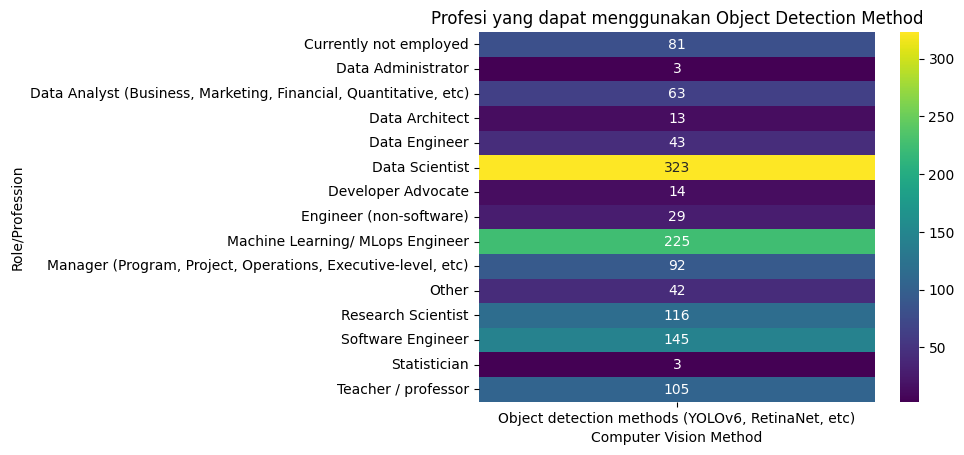

In [ ]:
# Visualisasi 'Role/Profession' berdasarkan 'Computer Vision Method'
crosstab = pd.crosstab(data3['Role/Profession'], data3['Computer Vision Method'])
sns.heatmap(crosstab, annot=True, cmap='viridis', fmt='d')
plt.title('Profesi yang dapat menggunakan Object Detection Method')
plt.show()

Berdasarkan visualisasi tersebut, dapat kita lihat bahwa semua profesi berdasarkan survey, bisa memahami Object Detection Method. Hal tersebut merupakan kabar baik tentunya, karena diluar sana masih banyak orang-orang yang dapat memahami Object Detection Method. Namun, tentu kita harus bijak dalam memilih kepada siapa kita akan menawarkan kerja sama. Berdasarkan data tersebut, terlihat bahwa profesi yang paling banyak bisa memahami Object Detection Method ialah Data Scientist sebanyak 323 orang. Hal ini yang bisa kita jadikan acuan untuk menawarkan kerja sama dalam pembuatan proyek deteksi lalu lintas otomatis.

In [ ]:
# Hanya mengambil Role/Profession Data Scientist
data4 = data3[data3['Role/Profession'] == 'Data Scientist']
print(data4.shape)
data4.head()

(323, 7)


,Country,Programming Experience,Machine Learning Experience,Computer Vision Method,Role/Profession,Industry (Field of Work),Salary
42,Indonesia,5-10 years,Under 1 year,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,Computers/Technology,"10,000-14,999"
106,Pakistan,5-10 years,5-10 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,Other,NaN
115,India,5-10 years,3-4 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,Computers/Technology,$0-999
124,Japan,3-5 years,3-4 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,Insurance/Risk Assessment,"4,000-4,999"
134,Colombia,10-20 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,Retail/Sales,"50,000-59,999"


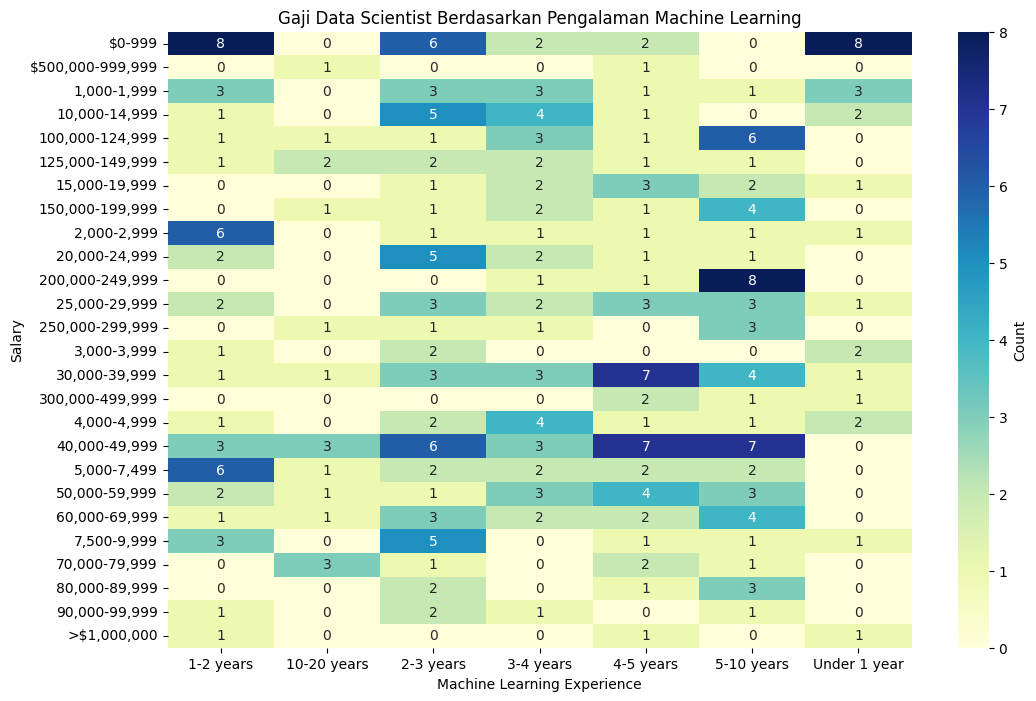

In [ ]:
# Visualisasi 'Salary' berdasarkan 'Machine Learning Experience'
# Membuat tabel kontingensi (contingency table)
contingency_table1 = pd.crosstab(index=data4['Salary'], columns=data4['Machine Learning Experience'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table1, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Count'})
plt.title('Gaji Data Scientist Berdasarkan Pengalaman Machine Learning')
plt.show()

In [ ]:
# Melihat seberapa banyak data scientist di Indonesia yang dapat menggunakan Computer Vision (Object Detection Method)
data5 = data4[data4['Country'] == 'Indonesia']
print(data5.shape)
data5.head()

(3, 7)


,Country,Programming Experience,Machine Learning Experience,Computer Vision Method,Role/Profession,Industry (Field of Work),Salary
42,Indonesia,5-10 years,Under 1 year,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,Computers/Technology,"10,000-14,999"
2706,Indonesia,1-3 years,3-4 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,Academics/Education,"4,000-4,999"
15190,Indonesia,1-3 years,1-2 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,Accounting/Finance,"1,000-1,999"


Disini ada info menarik, namun sekaligus terlihat cukup prihatin, karena berdasarkan data survey, profesi data scientist di Indonesia yang bisa memahami/menggunakan computer vision metode deteksi objek hanya sedikit, yakni 3 orang. Mirisnya lagi pengalaman mereka tidak ada yang lebih dari 5 tahun dalam machine learning. Tentunya, semakin lama pengalamannya maka akan semakin bagus. Dalam hal ini, saya kurang merekomendasikan ketiga orang tersebut untuk terjun dalam pembuatan proyek deteksi lalu lintas otomatis.

In [ ]:
# Melihat seberapa banyak data scientist di seluruh dunia yang berpengalaman dalam machine learning selama 10-20 tahun yang bisa menggunakan Object Detection Method
data6 = data4[data4['Machine Learning Experience'] == '10-20 years']
print(data6.shape)
data6.head(18)

(18, 7)


,Country,Programming Experience,Machine Learning Experience,Computer Vision Method,Role/Profession,Industry (Field of Work),Salary
134,Colombia,10-20 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,Retail/Sales,"50,000-59,999"
421,Brazil,10-20 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,Medical/Pharmaceutical,"40,000-49,999"
727,India,5-10 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,Broadcasting/Communications,"30,000-39,999"
2771,Taiwan,10-20 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,Online Service/Internet-based Services,"5,000-7,499"
2825,United States of America,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,Computers/Technology,NaN
3740,United States of America,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,Government/Public Service,"250,000-299,999"
5484,Australia,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,NaN,NaN
6696,United States of America,10-20 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,Accounting/Finance,"$500,000-999,999"
8019,Poland,10-20 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,Computers/Technology,"40,000-49,999"
9384,Spain,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Scientist,Academics/Education,"60,000-69,999"


Setelah saya coba lihat pengalaman machine learning data scientist yang berkisar diatas 10 tahun (10-20 tahun), ternyata ada 18 orang yang mana ini bisa kita pertimbangkan untuk merekrut data scientist dari luar negeri mengingat di Indonesia kita kekurangan data scientist. Menurut saya, potensi yang bagus jika kita merekrut data scientist dari negara Colombia, Brazil, India, Taiwan, Poland, dan Mexico, karena melihat gaji mereka tidak terlalu tinggi hanya berkisar puluhan ribu dolar US bahkan dari Taiwan hanya sekitar 5000-7499 USD, ini bisa menjadi estimasi berapa biaya yang akan dikeluarkan untuk membayar mereka dalam proyek deteksi lalu lintas otomatis.

### Bagaimana dengan profesi selain Data Scientist?

In [ ]:
# Mengambil semua profesi kecuali Data Scientist
data6 = data3[data3['Role/Profession'] != 'Data Scientist']
print(data6.shape)
data6.head()

(2202, 7)


,Country,Programming Experience,Machine Learning Experience,Computer Vision Method,Role/Profession,Industry (Field of Work),Salary
8,Germany,10-20 years,4-5 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Software Engineer,Insurance/Risk Assessment,"100,000-124,999"
12,Egypt,3-5 years,3-4 years,"Object detection methods (YOLOv6, RetinaNet, etc)",NaN,NaN,NaN
15,Pakistan,< 1 years,1-2 years,"Object detection methods (YOLOv6, RetinaNet, etc)",NaN,NaN,NaN
20,Italy,5-10 years,2-3 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Data Engineer,Computers/Technology,"30,000-39,999"
24,Argentina,1-3 years,2-3 years,"Object detection methods (YOLOv6, RetinaNet, etc)",NaN,NaN,NaN


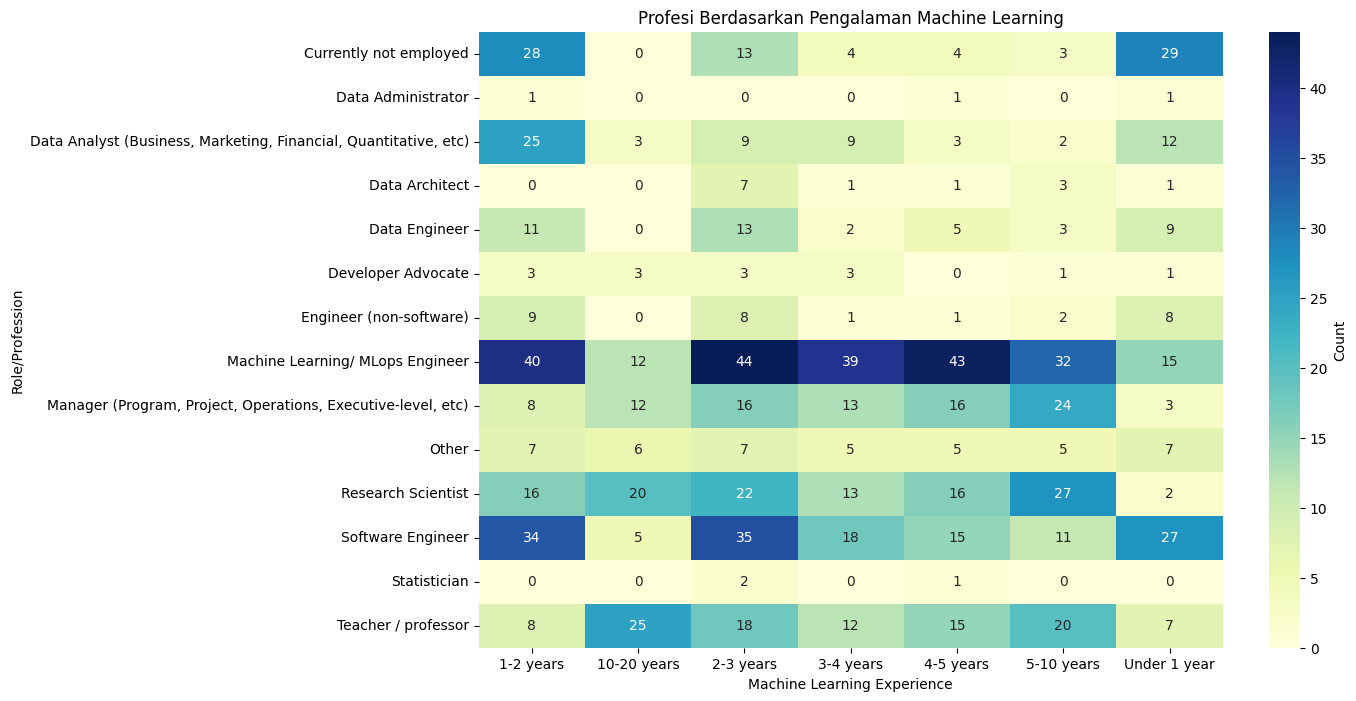

In [ ]:
# Visualisasi 'Role/Profession' berdasarkan 'Machine Learning Experience'
# Membuat tabel kontingensi (contingency table)
contingency_table3 = pd.crosstab(index=data6['Role/Profession'], columns=data6['Machine Learning Experience'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table3, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Count'})
plt.title('Profesi Berdasarkan Pengalaman Machine Learning')
plt.show()

In [ ]:
# Melihat profesi dengan pengalaman machine learning selama 10-20 tahun
data7 = data6[data6['Machine Learning Experience'] == '10-20 years']
print(data7.shape)
data7.head()

(106, 7)


,Country,Programming Experience,Machine Learning Experience,Computer Vision Method,Role/Profession,Industry (Field of Work),Salary
400,France,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)","Manager (Program, Project, Operations, Executi...",Computers/Technology,"60,000-69,999"
431,Israel,5-10 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Research Scientist,Medical/Pharmaceutical,NaN
1130,India,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Teacher / professor,Academics/Education,"80,000-89,999"
1335,South Africa,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Other,Energy/Mining,$0-999
1902,Czech Republic,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Research Scientist,Academics/Education,NaN


Terlihat ada 106 orang dari berbagai negara dan berbagai profesi non data scientist yang mampu memahami/menggunakan Object Detection Method dengan pengalaman machine learning selama 10-20 tahun. Selanjutnya saya akan melihat kisaran gaji yang mereka dapatkan, supaya kita bijak dalam menawarkan kerja sama kepada mereka.

In [ ]:
# Melihat profesi dengan pengalaman machine learning selama 10-20 tahun dan gaji yang diperoleh sekitar $0-999
data8 = data7[data7['Salary'] == '$0-999']
print(data8.shape)
data8.head()

(4, 7)


,Country,Programming Experience,Machine Learning Experience,Computer Vision Method,Role/Profession,Industry (Field of Work),Salary
1335,South Africa,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Other,Energy/Mining,$0-999
5451,United States of America,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Research Scientist,Medical/Pharmaceutical,$0-999
8049,Turkey,10-20 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Machine Learning/ MLops Engineer,Academics/Education,$0-999
13220,"Iran, Islamic Republic of...",20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Teacher / professor,Academics/Education,$0-999


Kandidat profesi dan negara yang dapat kita tawarkan kerja sama ialah Research Scientist dari USA, MLops Engineer dari Turkey, Teacher/Professor dari Iran, dan Other profession dari South Africa. Disini mengapa saya sarankan begitu? Karena para kandidat tersebut mempunyai pengalaman machine learning selama 10-20 tahun dan bisa memahami Object Detection Method, menariknya lagi gaji mereka semua hanya berkisar antara $0-999, yang mana sangat murah jika kita tawarkan kerja sama kepada mereka.

In [ ]:
# Melihat profesi dengan pengalaman machine learning selama 10-20 tahun dan gaji yang diperoleh sekitar $1,000-1,999
data9 = data7[data7['Salary'] == '1,000-1,999']
print(data9.shape)
data9.head()

(2, 7)


,Country,Programming Experience,Machine Learning Experience,Computer Vision Method,Role/Profession,Industry (Field of Work),Salary
6212,India,10-20 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Teacher / professor,Academics/Education,"1,000-1,999"
13550,India,10-20 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Teacher / professor,Academics/Education,"1,000-1,999"


Selanjutnya ada Teacher/Professor dari India yang bisa juga kita tawarkan kerja sama mengingat gaji mereka hanya berkisar antara $1000-1999.

In [ ]:
# Melihat profesi dengan pengalaman machine learning selama 10-20 tahun dan gaji yang diperoleh sekitar $3,000-3,999
data10 = data7[data7['Salary'] == '3,000-3,999']
print(data10.shape)
data10.head()

(1, 7)


,Country,Programming Experience,Machine Learning Experience,Computer Vision Method,Role/Profession,Industry (Field of Work),Salary
6587,United States of America,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Teacher / professor,Academics/Education,"3,000-3,999"


Lalu ada Teacher/Professor dari USA dengan gaji kisaran $3000-3999.

In [ ]:
# Melihat profesi dengan pengalaman machine learning selama 10-20 tahun dan gaji yang diperoleh sekitar $5,000-7,499
data11 = data7[data7['Salary'] == '5,000-7,499']
print(data11.shape)
data11.head()

(1, 7)


,Country,Programming Experience,Machine Learning Experience,Computer Vision Method,Role/Profession,Industry (Field of Work),Salary
21109,Brazil,10-20 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Research Scientist,Academics/Education,"5,000-7,499"


Kandidat selanjutnya ada Research Scientist dari Brazil dengan gaji kisaran $5000-7499.

In [ ]:
# Melihat profesi dengan pengalaman machine learning selama 10-20 tahun dan gaji yang diperoleh sekitar $7,500-9,999
data12 = data7[data7['Salary'] == '7,500-9,999']
print(data12.shape)
data12.head()

(2, 7)


,Country,Programming Experience,Machine Learning Experience,Computer Vision Method,Role/Profession,Industry (Field of Work),Salary
2746,Indonesia,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Teacher / professor,Academics/Education,"7,500-9,999"
10675,Canada,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Research Scientist,Retail/Sales,"7,500-9,999"


Disini akhirnya kita menemukan kandidat dari Indonesia yang merupakan seorang Teacher/Professor dengan pengalaman machine learning selama 10-20 tahun dan juga pengalaman programming selama lebih dari 20 tahun, selain itu ada Research Scientist dari Canada dengan pengalaman machine learning selama 10-20 tahun dan pengalaman programming selama lebih dari 20 tahun. Saya sangat merekomendasikan untuk Teacher/Professor dari Indonesia, karena kita harus mengutamakan anak bangsa terlebih dahulu ketimbang tenaga ahli dari negara lain.

In [ ]:
# Melihat profesi dengan pengalaman machine learning selama 10-20 tahun dan gaji yang diperoleh sekitar $10,000-14,999
data13 = data7[data7['Salary'] == '10,000-14,999']
print(data13.shape)
data13.head()

(5, 7)


,Country,Programming Experience,Machine Learning Experience,Computer Vision Method,Role/Profession,Industry (Field of Work),Salary
8130,Japan,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Research Scientist,Academics/Education,"10,000-14,999"
8700,Turkey,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Research Scientist,Retail/Sales,"10,000-14,999"
8845,Turkey,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)","Data Analyst (Business, Marketing, Financial, ...",Academics/Education,"10,000-14,999"
11122,Thailand,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Teacher / professor,Academics/Education,"10,000-14,999"
21148,India,10-20 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Teacher / professor,Academics/Education,"10,000-14,999"


Selanjutnya ada Research Scientist dari Japan, Research Scientist dari Turkey, Data Analyst dari Turkey, Teacher/Professor dari Thailand, dan Teacher/Professor dari India dengan kisaran gaji mereka ialah $10,000-14,999.

In [ ]:
# Melihat profesi dengan pengalaman machine learning selama 10-20 tahun dan gaji yang diperoleh sekitar $15,000-19,999
data14 = data7[data7['Salary'] == '15,000-19,999']
print(data14.shape)
data14.head()

(1, 7)


,Country,Programming Experience,Machine Learning Experience,Computer Vision Method,Role/Profession,Industry (Field of Work),Salary
8778,India,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Teacher / professor,Academics/Education,"15,000-19,999"


Lalu kita menemukan lagi kandidat dari India, ia merupakan seorang Teacher/Professor dengan pengalaman machine learning selama 10-20 tahun dan gaji yang diperoleh sekitar $15,000-19,999.

In [ ]:
# Melihat profesi dengan pengalaman machine learning selama 10-20 tahun dan gaji yang diperoleh sekitar $30,000-39,999
data15 = data7[data7['Salary'] == '30,000-39,999']
print(data15.shape)
data15.head()

(4, 7)


,Country,Programming Experience,Machine Learning Experience,Computer Vision Method,Role/Profession,Industry (Field of Work),Salary
18359,Egypt,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Teacher / professor,Academics/Education,"30,000-39,999"
18924,Viet Nam,10-20 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Machine Learning/ MLops Engineer,Online Service/Internet-based Services,"30,000-39,999"
21760,India,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)","Manager (Program, Project, Operations, Executi...",Computers/Technology,"30,000-39,999"
22712,United States of America,< 1 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Developer Advocate,Energy/Mining,"30,000-39,999"


Selanjutnya ada Teacher/Professor dari Egypt, MLops Engineer dari Vietnam, dan Manager (Program, Project, Operations, etc) dari India dengan kisaran gaji $30,000-39,999. Disini saya tidak merekomendasikan untuk Developer Advocate dari USA karena pengalaman machine learning selama 10-20 tahun, namun pengalaman programming kurang dari 1 tahun, hal ini bisa saja merupakan noise, karena ketimpangan yang cukup besar antara pengalaman programming dan pengalaman machine learning.

In [ ]:
# Melihat profesi dengan pengalaman machine learning selama 10-20 tahun dan gaji yang diperoleh sekitar $40,000-49,999
data16 = data7[data7['Salary'] == '40,000-49,999']
print(data16.shape)
data16.head()

(3, 7)


,Country,Programming Experience,Machine Learning Experience,Computer Vision Method,Role/Profession,Industry (Field of Work),Salary
4011,Mexico,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Teacher / professor,Academics/Education,"40,000-49,999"
12427,India,10-20 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)","Manager (Program, Project, Operations, Executi...",Academics/Education,"40,000-49,999"
16753,Portugal,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Teacher / professor,Academics/Education,"40,000-49,999"


Selanjunya untuk kisaran gaji $40,000-49,999, ada Teacher/Professor dari Mexico, Manager (Program, Project, Operation, etc) dari India, dan Teacher/Professor dari Portugal.

In [ ]:
# Melihat profesi dengan pengalaman machine learning selama 10-20 tahun dan gaji yang diperoleh sekitar $50,000-59,999
data17 = data7[data7['Salary'] == '50,000-59,999']
print(data17.shape)
data17.head()

(6, 7)


,Country,Programming Experience,Machine Learning Experience,Computer Vision Method,Role/Profession,Industry (Field of Work),Salary
5288,Taiwan,10-20 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Software Engineer,Computers/Technology,"50,000-59,999"
7903,United Kingdom of Great Britain and Northern I...,1-3 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Developer Advocate,Computers/Technology,"50,000-59,999"
12399,Italy,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Research Scientist,Academics/Education,"50,000-59,999"
12639,Brazil,20+ years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Research Scientist,Academics/Education,"50,000-59,999"
21250,Japan,10-20 years,10-20 years,"Object detection methods (YOLOv6, RetinaNet, etc)",Research Scientist,Computers/Technology,"50,000-59,999"


Lalu kandidat yang terakhir yang saya rekomendasikan berdasarkan rentang gaji $50,000-59,999 ialah Software Engineer dari Taiwan, Research Scientist dari Italy, Brazil, dan Japan. Lagi-lagi saya meragukan Developer Advocate dari UK, karena ketimpangan antara pengalaman machine learning dengan pengalaman programming yang cukup besar. Hal ini mengindikasikan kemungkinan adanya noise, karena pada umumnya seseorang yang berpengalaman dalam machine learning juga akan berpengalaman dalam programming setidaknya ketimpangan antara pengalaman machine learning dan programming tidak terlalu besar.

### One-Hot-Encoding

In [ ]:
# Memilih variabel yang akan diklasterisasi
data_new = data3[['Machine Learning Experience', 'Role/Profession', 'Salary']]
print(data_new.shape)
data_new.head()

(2525, 3)


,Machine Learning Experience,Role/Profession,Salary
8,4-5 years,Software Engineer,"100,000-124,999"
12,3-4 years,NaN,NaN
15,1-2 years,NaN,NaN
20,2-3 years,Data Engineer,"30,000-39,999"
24,2-3 years,NaN,NaN


In [ ]:
# Reset index
data_reset = data_new.reset_index(drop=True)
data_reset.head()

,Machine Learning Experience,Role/Profession,Salary
0,4-5 years,Software Engineer,"100,000-124,999"
1,3-4 years,NaN,NaN
2,1-2 years,NaN,NaN
3,2-3 years,Data Engineer,"30,000-39,999"
4,2-3 years,NaN,NaN


In [ ]:
# Lakukan one-hot encoding untuk setiap kolom kategorikal
encoded_data = pd.get_dummies(data_reset, columns=['Machine Learning Experience', 'Role/Profession', 'Salary'])

# Tampilkan hasil
print(encoded_data.shape)
encoded_data.head()

(2525, 48)


,Machine Learning Experience_1-2 years,Machine Learning Experience_10-20 years,Machine Learning Experience_2-3 years,Machine Learning Experience_3-4 years,Machine Learning Experience_4-5 years,Machine Learning Experience_5-10 years,Machine Learning Experience_Under 1 year,Role/Profession_Currently not employed,Role/Profession_Data Administrator,"Role/Profession_Data Analyst (Business, Marketing, Financial, Quantitative, etc)",...,"Salary_4,000-4,999","Salary_40,000-49,999","Salary_5,000-7,499","Salary_50,000-59,999","Salary_60,000-69,999","Salary_7,500-9,999","Salary_70,000-79,999","Salary_80,000-89,999","Salary_90,000-99,999","Salary_>$1,000,000"
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans

wcss = [] # WCSS: Within-Cluster Sum of Squares
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
  kmeans.fit(encoded_data)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

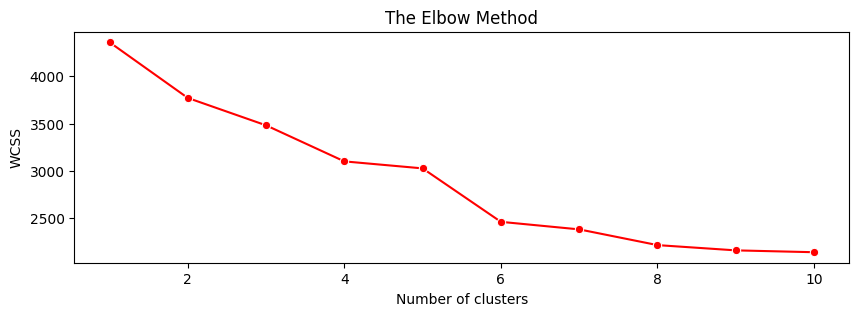

In [ ]:
# Visualisasi elbow plot
plt.figure(figsize=(10, 3))
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Fitting K-Means ke dataset
kmeans = KMeans(n_clusters = 6, init = 'random', random_state = 42)
cluster = kmeans.fit_predict(encoded_data)
df = pd.DataFrame(cluster, columns = ['Clusters'])
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Clusters
0,0
1,4
2,2
3,5
4,5
...,...
2520,4
2521,2
2522,1
2523,1


In [ ]:
df = pd.concat([data_reset, df], axis=1)
df

,Machine Learning Experience,Role/Profession,Salary,Clusters
0,4-5 years,Software Engineer,"100,000-124,999",0
1,3-4 years,NaN,NaN,4
2,1-2 years,NaN,NaN,2
3,2-3 years,Data Engineer,"30,000-39,999",5
4,2-3 years,NaN,NaN,5
...,...,...,...,...
2520,3-4 years,Data Scientist,"1,000-1,999",4
2521,1-2 years,NaN,NaN,2
2522,10-20 years,Research Scientist,NaN,1
2523,Under 1 year,NaN,NaN,1


In [ ]:
C0 = df[df.Clusters == 0]
C1 = df[df.Clusters == 1]
C2 = df[df.Clusters == 2]
C3 = df[df.Clusters == 3]
C4 = df[df.Clusters == 4]
C5 = df[df.Clusters == 5]

In [ ]:
C0.value_counts()

Machine Learning Experience  Role/Profession                   Salary           Clusters
4-5 years                    Data Scientist                    30,000-39,999    0           7
                                                               40,000-49,999    0           7
                             Machine Learning/ MLops Engineer  40,000-49,999    0           5
                                                               25,000-29,999    0           5
                                                               10,000-14,999    0           4
                                                                                           ..
                                                               20,000-24,999    0           1
                                                               2,000-2,999      0           1
                                                               125,000-149,999  0           1
                             Engineer (non-software)           $0

In [ ]:
C1.value_counts()

Machine Learning Experience  Role/Profession                                                   Salary           Clusters
Under 1 year                 Data Scientist                                                    $0-999           1           8
                             Data Analyst (Business, Marketing, Financial, Quantitative, etc)  $0-999           1           4
                             Software Engineer                                                 5,000-7,499      1           4
                             Machine Learning/ MLops Engineer                                  $0-999           1           4
10-20 years                  Machine Learning/ MLops Engineer                                  60,000-69,999    1           4
                                                                                                                           ..
                             Research Scientist                                                60,000-69,999    1          

In [ ]:
C2.value_counts()

Machine Learning Experience  Role/Profession                   Salary           Clusters
1-2 years                    Machine Learning/ MLops Engineer  $0-999           2           13
                             Data Scientist                    $0-999           2            8
                                                               2,000-2,999      2            6
                                                               5,000-7,499      2            6
                             Machine Learning/ MLops Engineer  7,500-9,999      2            4
                                                                                            ..
                             Engineer (non-software)           150,000-199,999  2            1
                                                               10,000-14,999    2            1
                                                               $0-999           2            1
                             Developer Advocate         

In [ ]:
C3.value_counts()

Machine Learning Experience  Role/Profession                                               Salary           Clusters
5-10 years                   Data Scientist                                                200,000-249,999  3           8
                                                                                           40,000-49,999    3           7
                                                                                           100,000-124,999  3           6
                             Manager (Program, Project, Operations, Executive-level, etc)  150,000-199,999  3           4
                             Data Scientist                                                60,000-69,999    3           4
                                                                                                                       ..
                             Research Scientist                                            10,000-14,999    3           1
                             

In [ ]:
C4.value_counts()

Machine Learning Experience  Role/Profession                                               Salary           Clusters
3-4 years                    Machine Learning/ MLops Engineer                              40,000-49,999    4           6
                             Research Scientist                                            $0-999           4           5
                             Machine Learning/ MLops Engineer                              20,000-24,999    4           5
                             Data Scientist                                                4,000-4,999      4           4
                                                                                           10,000-14,999    4           4
                                                                                                                       ..
                             Manager (Program, Project, Operations, Executive-level, etc)  100,000-124,999  4           1
                             

In [ ]:
C5.value_counts()

Machine Learning Experience  Role/Profession                   Salary           Clusters
2-3 years                    Machine Learning/ MLops Engineer  $0-999           5           7
                             Data Scientist                    40,000-49,999    5           6
                             Software Engineer                 $0-999           5           6
                             Data Scientist                    $0-999           5           6
                                                               10,000-14,999    5           5
                                                                                           ..
                             Engineer (non-software)           70,000-79,999    5           1
                                                               60,000-69,999    5           1
                                                               2,000-2,999      5           1
                                                               15

## **Kesimpulan**
Berdasarkan hasil analisis data, dapat disimpulkan bahwa Data Scientist menjadi profesi yang paling mendominasi dalam pemahaman terhadap Object Detection Method, dengan 323 orang yang memiliki pengetahuan tersebut. Meskipun demikian, kuantitas belum sepenuhnya menjamin bahwa mereka kompeten/berpengalaman, terbukti dengan adanya Data Scientist di Indonesia yang memiliki pemahaman tersebut, dan rata-rata pengalaman mereka dalam machine learning kurang dari 5 tahun. Oleh karena itu, perlu kita telaah lebih lanjut terkait pengalaman individu dalam machine learning.

Dalam mencari kandidat potensial dari luar negeri, terdapat sekitar 18 orang dengan pengalaman machine learning selama 10-20 tahun yang bisa dipertimbangkan. Negara-negara seperti Colombia, Brazil, India, Taiwan, Poland, dan Mexico menjadi sumber kandidat yang potensial dengan gaji yang masih terjangkau untuk proyek deteksi lalu lintas otomatis. Selanjutnya, dari kandidat dengan pemahaman Object Detection Method dan pengalaman machine learning selama 10-20 tahun, teridentifikasi sebanyak 106 orang dari berbagai profesi dan negara. Kandidat potensial untuk kerja sama melibatkan Research Scientist dari USA, MLops Engineer dari Turkey, Teacher/Professor dari Iran, dan profesi lainnya dari South Africa.

Meskipun begitu, rekomendasi utama tetap diprioritaskan kepada kandidat lokal. Terdapat satu Teacher/Professor dari Indonesia yang memiliki pengalaman machine learning 10-20 tahun yang dapat dipertimbangkan. Namun, dalam mengambil keputusan, perlu diperhatikan juga beberapa kandidat internasional yang memiliki rentang gaji yang sesuai, seperti Teacher/Professor dari India, Research Scientist dari Brazil, dan lainnya.

Pertimbangan akhir perlu dilakukan dengan cermat, memperhitungkan faktor pemahaman Object Detection Method, pengalaman machine learning, dan rentang gaji yang sesuai. Pemberian prioritas kepada kandidat lokal, saya anggap sebagai keputusan yang bijak, dengan tetap membuka peluang untuk bekerja sama dengan kandidat internasional yang memiliki kualifikasi dan gaji yang sesuai dengan proyek deteksi lalu lintas otomatis.